In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

SAME DATA AS THE ONE WE USED IN LINEAR REGRESSION SO THE PROCESS IS BASICALLY THE SAME UNTIL THE MODELING EXCEPT WE ARE GONNA DO SOME PLOTTING TO OBSERVE WHICH VARIABLE WOULD HAVE THE MORE IMPACT ON SALES

In [2]:
data = pd.read_csv('data/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


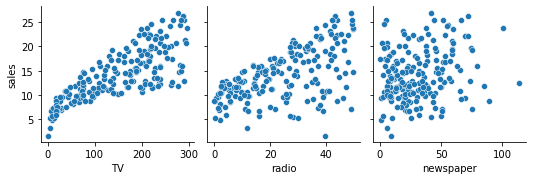

In [6]:
sns.pairplot(
             data,
             x_vars=['TV', 'radio', 'newspaper'],
             y_vars=['sales'],
            )

As you could guess tv advertisements seem to have the most affect on sales

In [7]:
x = data[['TV', 'radio', 'newspaper']]

In [8]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y = data['sales']

In [10]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [11]:
x.shape

(200, 3)

In [12]:
y.shape

(200,)

need to reshape our y column(train_test_split expects a column)

In [13]:
y = y.values.reshape(-1, 1)

In [14]:
y.shape

(200, 1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [17]:
x_train.shape, x_test.shape

((140, 3), (60, 3))

In [18]:
y_train.shape, y_test.shape

((140, 1), (60, 1))

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

In [22]:
y_pred[:5]

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131]])

Let's take a look at our results VISUALLY first 

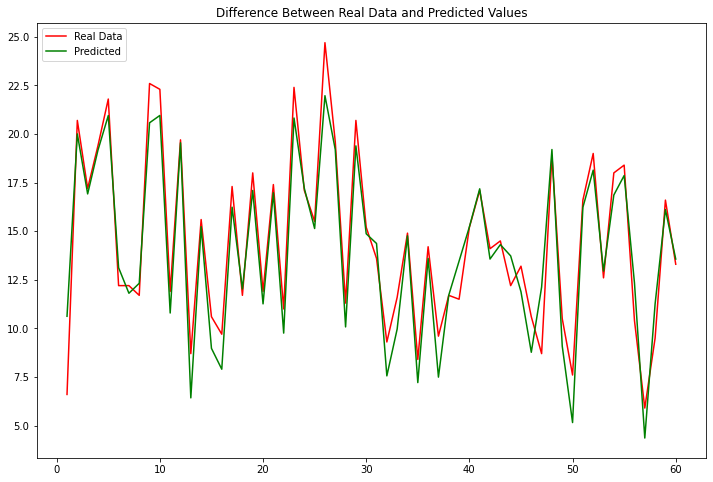

In [23]:
indexes = range(1,61)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Difference Between Real Data and Predicted Values')

ax.plot(indexes, y_test, color='red', label='Real Data')
ax.plot(indexes, y_pred, color='green', label='Predicted')
plt.legend(loc='upper left')



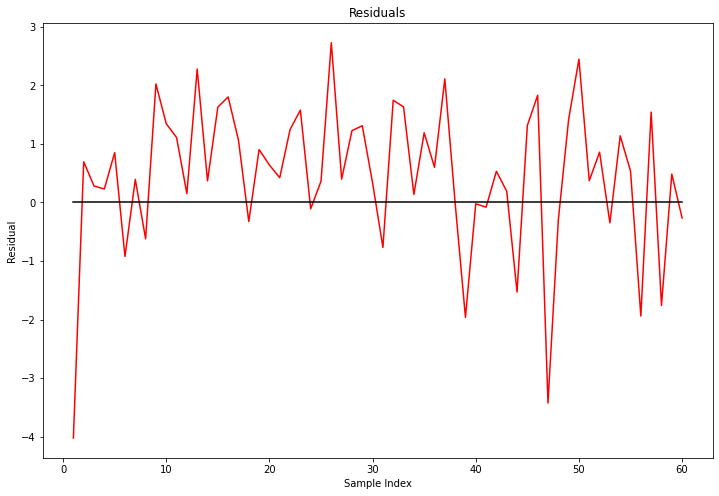

In [24]:
indexes = range(1, 61)
zeros = np.zeros(60)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Residuals')
plt.xlabel('Sample Index')
plt.ylabel('Residual')


ax.plot(indexes, y_test - y_pred, color='red', label='Residuals')
ax.plot(indexes, zeros, color='black', label='Zero')



In [25]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [26]:
r2 = r2_score(y_test, y_pred)
r2

0.9058622107532247

we have a real good r2 score but let's also check rmse

In [27]:
mse = mean_squared_error(y_test, y_pred)
mse

1.850681994163694

In [28]:
rmse = sqrt(mse)
rmse

1.3603977338130544

Our rmse also implies that our predicted y's don't differ too much from the test(original) data

Now let's check if we need all the predictors we used, it's highly possible that a trivial tool as newspaper could have little to no affect on sales so let's also verify that

In [29]:
x_train.head()

,TV,radio,newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


Thing is that ols requires constant values to calculate B0 so we gotta add a constant column first

In [30]:
import statsmodels.api as sm

In [31]:
x_train_ols = sm.add_constant(x_train)
x_train_ols.head()

D:\downloads\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV,radio,newspaper
74,1.0,213.4,24.6,13.1
3,1.0,151.5,41.3,58.5
185,1.0,205.0,45.1,19.6
26,1.0,142.9,29.3,12.6
90,1.0,134.3,4.9,9.3


In [32]:
model = sm.OLS(y_train, x_train_ols)

In [33]:
results = model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           9.97e-66
Time:                        17:37:38   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
radio          0.1898      0.011     17.009      0.000       0.168       0.212
newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we should get rid of the newspaper variable because it's p-value goes beyond 5 which is the threshold of %95 probability

In [35]:
x_train2 = x_train[['TV', 'radio']]
x_train2.head()

,TV,radio
74,213.4,24.6
3,151.5,41.3
185,205.0,45.1
26,142.9,29.3
90,134.3,4.9


In [36]:
x_test2 = x_test[['TV', 'radio']]

In [37]:
lr_ols = LinearRegression()

In [38]:
lr_ols.fit(x_train2, y_train)

LinearRegression()

In [39]:
y_pred2 = lr_ols.predict(x_test2)

In [40]:
y_pred2[:5]

array([[10.56198847],
       [20.16735504],
       [16.90186462],
       [19.07993718],
       [21.03892699]])

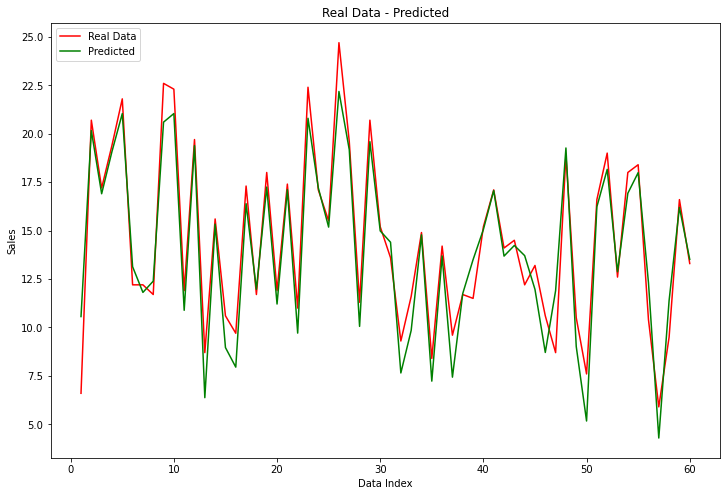

In [48]:
# Now let's visualize our results again
indexes = range(1, 61)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Real Data - Predicted')
plt.xlabel('Data Index')
plt.ylabel('Sales')


ax.plot(indexes, y_test, color="red", label="Real Data")
ax.plot(indexes, y_pred2, color="green", label="Predicted")
plt.legend(loc='upper left')

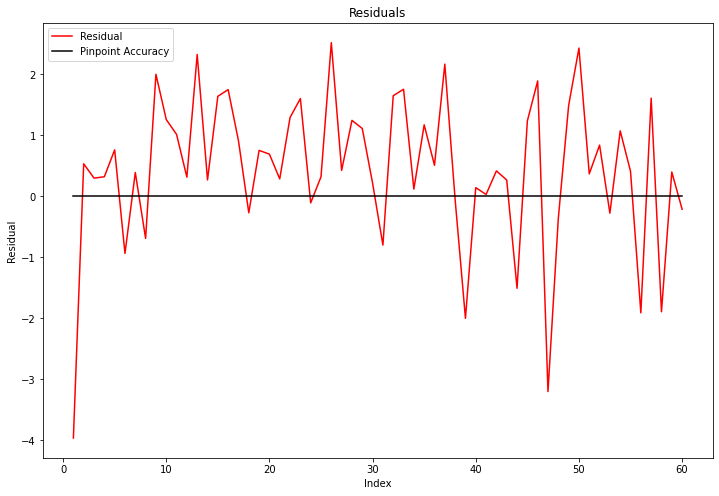

In [49]:
indexes = range(1, 61)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')

ax.plot(indexes, y_test - y_pred2, color='red', label='Residual')
ax.plot(indexes, zeros, color='black', label='Pinpoint Accuracy')
plt.legend(loc='upper left')

In [51]:
r2_score_2 = r2_score(y_test, y_pred2)
r2_score_2

0.909216449171822

In [52]:
mse2 = mean_squared_error(y_test, y_pred2)
mse2

1.784740052090281

In [53]:
rmse2 = sqrt(mse2)

In [54]:
rmse2

1.3359416349864544

In [55]:
x_train2_ols = sm.add_constant(x_train2)
x_train2_ols

D:\downloads\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV,radio
74,1.0,213.4,24.6
3,1.0,151.5,41.3
185,1.0,205.0,45.1
26,1.0,142.9,29.3
90,1.0,134.3,4.9
...,...,...,...
87,1.0,110.7,40.6
103,1.0,187.9,17.2
67,1.0,139.3,14.5
24,1.0,62.3,12.6


In [56]:
model2 = sm.OLS(y_train, x_train2_ols)

In [58]:
results = model2.fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           4.46e-67
Time:                        17:46:43   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.000       1.992       3.446
TV             0.0455      0.002     27.368      0.000       0.042       0.049
radio          0.1925      0.010     18.860      0.000       0.172       0.213
==============================================================================
Omnibus:                       41.530   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.544
Skew:                          -1.255   Prob(JB):                     2.18e-20
Kurtosis:                       6.037   Cond. No.                         419.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

as we expected we didn't lose almost anything by omitting newspaper which can be inferred from r2 score and as a result our models is much more concise now since we got rid of a redundant variable